In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Act Report

In [2]:
act = pd.read_csv("twitter_archive_master.csv")

In [3]:
act.head()

,Unnamed: 0,tweet_id,timestamp,rating_numerator,rating_denominator,name,favorites,retweets,dog_status,Year,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,39467,8853,NaN,2017,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,33819,6514,NaN,2017,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,25461,4328,NaN,2017,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,42908,8964,NaN,2017,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,41048,9774,NaN,2017,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Hypothesis

> **Questions**

1. What year has the highest amount of tweets and favourites 
2. Most common dog stage
3. Dog stage with highest ratings
4. Month with the highest amount of tweets and favourites 



**Most of the tweets were from 2016. This could mean that there were more active user in 2016 or that WeRateDogs had more active members in 2016. There was a gradual reduction in number of tweets over the years.  Year 2015 had 660 tweets while 2017 had 385 tweets.**

In [5]:
#Year with the highest tweets
act.Year.value_counts()

2016    1007
2015     660
2017     385
Name: Year, dtype: int64

**2017 had the highest number of retweets. The number of retweets also increased over the years.**

In [21]:
#Year with the highest retweets
act.groupby('Year').mean()['retweets'].sort_values(ascending=False)

Year
2017    6346.935065
2016    2957.585899
2015    1076.400000
Name: retweets, dtype: float64

**The number of favorites has also increased over the years with 2017 having the hightest**

In [22]:
#Year with the highest favorites

act.groupby('Year').mean()['favorites'].sort_values(ascending=False)

Year
2017    22205.124675
2016     7390.386296
2015     2485.966667
Name: favorites, dtype: float64

**The most common dog status is pupper**

In [28]:
#Number of dog status based on tweets
act.groupby('dog_status').count()['tweet_id'].sort_values(ascending=False)

dog_status
pupper     223
doggo       74
puppo       29
floofer      3
Name: tweet_id, dtype: int64

**Months with the highest number of tweet is December**

In [31]:
#Months with the highest retweets
act.groupby('Month').count()['tweet_id'].sort_values(ascending=False)

Month
12    424
11    365
1     243
2     177
3     171
7     142
6     127
5     102
4      96
10     70
9      70
8      65
Name: tweet_id, dtype: int64

**June has the highest number of retweets followed by May and then July**

In [32]:
#Months with the highest retweets
act.groupby('Month').mean()['retweets'].sort_values(ascending=False)

Month
6     4972.307087
5     4699.274510
7     4454.063380
10    4346.842857
9     4287.042857
8     4054.338462
4     3459.916667
1     3285.592593
3     2933.076023
2     2743.689266
12    2106.471698
11    1397.832877
Name: retweets, dtype: float64

**Alson June has the highest number of favourites followed by May and then July**

In [33]:
act.groupby('Month').mean()['favorites'].sort_values(ascending=False)

Month
6     16083.889764
5     15373.147059
7     15223.098592
4     12329.989583
10    12054.642857
8     10483.461538
9     10187.357143
2      9408.994350
3      8932.929825
1      8034.847737
12     5075.466981
11     3123.293151
Name: favorites, dtype: float64

**The average rating of a dog is 1.06**

In [35]:
act.rating.mean()#.sort_values(ascending=False)

1.0597244373560155

**Floofer has the highest average rating, followed by puppoo**

In [14]:
act.groupby('dog_status').mean()['rating'].sort_values(ascending=False)

dog_status
floofer    1.266667
puppo      1.213793
doggo      1.166216
pupper     1.060987
Name: rating, dtype: float64

**The year with the highest mean rating was 2017, followed by 2016 and then 2016. This could mean that the dog rating increases with the year and that the dog are getting better, cuter and finer over the year.**

In [15]:
act.groupby('Year').mean()['rating'].sort_values(ascending=False)

Year
2017    1.242597
2016    1.075129
2015    0.929545
Name: rating, dtype: float64

**The month with the highest mean rating is May with a rating of 1.17.**

In [16]:
act.groupby('Month').mean()['rating'].sort_values(ascending=False)

Month
5     1.174510
10    1.167143
7     1.147183
4     1.132292
9     1.122857
8     1.104615
3     1.104094
6     1.100143
2     1.090960
1     1.077516
12    0.993868
11    0.948493
Name: rating, dtype: float64

**The most common name of a dog is Charlie having 11 appearances.**

In [36]:
#top ten ratings
act.groupby('name').count()['tweet_id'].sort_values(ascending=False).iloc[2:12]

name
Charlie    11
Cooper     10
Oliver     10
Lucy       10
Tucker     10
Penny      10
Bo          8
Winston     8
Sadie       8
Lola        8
Name: tweet_id, dtype: int64

**Top 10 most common breed of dogs**

In [44]:
act.p1.value_counts()[:10]

golden_retriever      147
Labrador_retriever     97
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             37
malamute               30
Name: p1, dtype: int64

**The mean/average confidence of the algorithm**

In [51]:
act.p1_conf.mean()

0.594441695077973

In [54]:
act.groupby(['p1_conf', 'name', 'p1']).mean()['rating'].sort_values(ascending=False)[:10]

p1_conf   name     p1                
0.993651  None     web_site              1.5
0.511319  Cassie   Pembroke              1.4
0.392535  Doobert  Bedlington_terrier    1.4
0.134081  Smiley   Pembroke              1.4
0.873233  Ollie    golden_retriever      1.4
0.351308  Bo       standard_poodle       1.4
0.919649  Iggy     web_site              1.4
0.281463  a        Samoyed               1.4
0.777562  Kuyu     bloodhound            1.4
0.662660  Laika    pedestal              1.4
Name: rating, dtype: float64

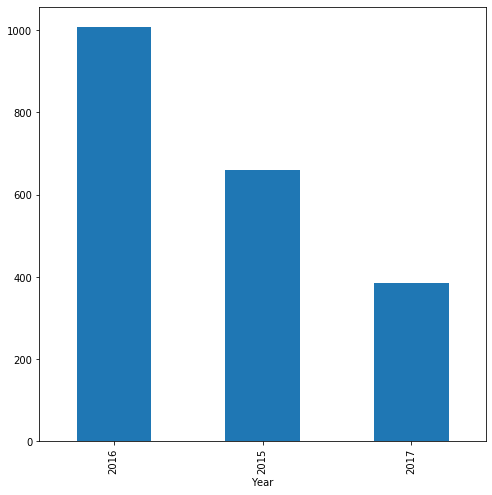

In [20]:
plt.figure(figsize=(8,8))
act.groupby('Year').count()['retweets'].sort_values(ascending=False).plot(kind='bar');
